# Data Scientist (RO 27) Assignment - Clean Transportation Branch - March 2023

### Submitted by: Matthew Buttler Ives

### Due Date: 6:00 PM, March 22nd, 2023

### Overview and Summary of Dataset:

### The dataset is provided in tabular format with 1779 rows and 70 columns. Removing completely null columns, the dataset is reduced to 38, which appears to be due to columns meant to contain fossil fuel related data variables. The dataset's timeframe is from March 2011 and ends on March 2023. The data outlines variables associated to the BC EV Charging Network and a normal amount of missing data variables is present. 

### The dataset provided by the federal government is useful in allowing us to gauge overall growth, location, type and pricing of the EV charging station network in British Columbia (BC). Based on the data, the BC EV charging network is posed to see its largest growth in 2023, as 2022 set a record year for the number of EV charging stations available to consumers. The EV network is primiarly situated in BC's largest cities with Vancouver making up 15% of the total available EV charging stations, followed by Victoria at 6.35%. The average number of EV charging stations a city has in BC is 8 but many cities outside of the greater Vancouver area only have one charging station. Of BC's EV charging stations, 77% of them soley have EVSE level 2 support while an additional 20% offer a hybird model of offering level 2 and fast charger support. The pricing of this EV network is hard to determine as the vast majority of responses are not present within the data. What is available allows us to determine that 63% of BC EV's charging network is free while the remaining have either free with parking fees required or require payment per minute of use.

In [109]:
# Importing necessary python packages
import numpy as np
import pandas as pd

# Importing plotly python packages for visuals
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
%config InlineBackend.figure_format ='retina'
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Math and statistic packages
from pylab import rcParams
import statsmodels.api as sm

# Linear Forecast Packages
import statsmodels.formula.api as smf

# Importing the data collected from the Government Path using the filepath name on my local computer
df = pd.read_csv('/Users/matthewbuttlerives/Downloads/alt_fuel_stations (Mar 19 2023).csv')

In [110]:
# Quick Look of dataset
pd.set_option('display.max_columns', None)
df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name
0,ELEC,City of Nanaimo - Underground Parking Lot,101 Gordon St,NaN,Nanaimo,BC,V9R 5J6,NaN,250-754-4251,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,200-9,49.164770,-123.936147,2020-03-05,83426,2021-06-07 17:08:43 UTC,P,NaN,NaN,2017-02-15,NaN,NaN,NaN,NaN,J1772,CA,NaN,Accessible 24 heures par jour,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,ELEC,Fulford Community Hall,2591 Fulford-Ganges Rd,NaN,Salt Spring Island,BC,V8K 1Z4,NaN,NaN,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,GPS,48.772431,-123.465926,2022-08-09,83491,2022-08-09 21:18:29 UTC,P,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,J1772,CA,NaN,24 heures par jour,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free; donations accepted,Gratuit; dons acceptés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,ELEC,Poets Cove Resort and Spa,9801 Spalding Rd,NaN,Pender Island,BC,V0N 2M3,NaN,250-629-2100,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,48.748128,-123.227170,2022-08-09,83492,2022-08-09 21:18:29 UTC,P,NaN,NaN,2017-05-17,NaN,NaN,NaN,NaN,J1772,CA,NaN,Accessible 24 heures par jour,NaN,Public,NaN,public,NaN,NaN,HOTEL,NaN,NaN,NaN,NaN,NaN,NaN,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,ELEC,City of Merritt - City Hall,2185 Voght St,Located on the front posts of the building,Merritt,BC,V1K 1R6,NaN,250-378-4224,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,200-9,50.112488,-120.788241,2022-07-08,83527,2022-07-08 16:02:07 UTC,P,NaN,NaN,2014-06-15,NaN,NaN,NaN,NaN,J1772,CA,Située sur les poteaux avant du btiment,Accessible 24 heures par jour,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,ELEC,North Shore Kia,855 W 1st St,NaN,North Vancouver,BC,V7P 1A4,NaN,NaN,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,GPS,49.317660,-123.096703,2022-04-13,83550,2022-04-26 16:04:15 UTC,P,NaN,NaN,2021-02-09,NaN,NaN,NaN,NaN,J1772,CA,NaN,Heures d’ouverture du concessionnaire,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [111]:
# Datasets Shape
df.shape

(1779, 70)

In [112]:
# Dataset info regarding column name, null/non-null count, and column type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    1779 non-null   object 
 1   Station Name                      1779 non-null   object 
 2   Street Address                    1779 non-null   object 
 3   Intersection Directions           21 non-null     object 
 4   City                              1779 non-null   object 
 5   State                             1779 non-null   object 
 6   ZIP                               1779 non-null   object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     1582 non-null   object 
 9   Status Code                       1779 non-null   object 
 10  Expected Date                     199 non-null    object 
 11  Groups With Access Code           1779 non-null   object 
 12  Access

In [113]:
# Removing all columns that have no non-null values.
df = df.dropna(axis=1, how='all')
df.shape

(1779, 38)

In [114]:
### Examining Rows entirely unary values
def unary_features(x):
    x_column_names = list(x.columns)
    count = 0
    print('\033[1m' +'Columns Entirely Unary'+'\033[0m')
    for i in x_column_names:
        if x[i].nunique(dropna=True) == 1:
            print(i,':','\033[1m'+str(x[i][0])+'\033[0m')
            count += 1
        else:
            pass
    if count == 0:
        print('\033[1m' +'No Entirely Unary Columns'+'\033[0m')
    return x
unary_features(df)

# What this basic fuction examines is which columns have only unary variables. This information is helpful as it confirms
# that the dataset is focused only on Electric Fuel types, within the province of British Columbia and are of public access.
# These columns can now be removed as they only contain one unique value for the entire dataset and can be removed without
# effecting the analysis of the overall dataset as they don't provide any more additional information/context.

df = df.drop(columns = ['Fuel Type Code','State','Country','Access Code'])

Columns Entirely Unary
Fuel Type Code : ELEC
State : BC
Country : CA
Access Code : public


In [115]:
# There are also additional columns that relay the same information but are presented in French. In order to focus on the
# core description of the dataset and that it does not appear that any stakeholders must be presented to in French, I 
# will remove these additional columns that are in French.

df = df[df.columns.drop(list(df.filter(regex='French')))]

## City Analysis

In [116]:
# First I am curious to examine the distribution of electric charging stations across BC by City. From previous info query, there
# are no null values within this column.

df['City'].value_counts()

Vancouver            281
Victoria             109
Richmond             104
Burnaby               96
Surrey                90
                    ... 
Thompson-Nicola I      1
Fanny Bay              1
Cariboo K              1
Gabriola Island        1
Lumby                  1
Name: City, Length: 237, dtype: int64

In [117]:
# If we convert these value counts to a dataframe, we can create quick visualizations to understand EV charging stations
# across BC by City. Then lets show that dataframe with the top ten cities whom have charging stations by count.
bar_chart = df.City.value_counts().rename_axis('City').reset_index(name='Count').sort_values(by=['Count'],ascending=False)
bar_chart.head(10)

,City,Count
0,Vancouver,281
1,Victoria,109
2,Richmond,104
3,Burnaby,96
4,Surrey,90
5,North Vancouver,51
6,Abbotsford,46
7,Delta,44
8,Kelowna,37
9,Whistler,34


### From further examining the City column, it appears there are duplicates, in that some cities have been entered in all capital letters while others have been entered with only the first letter capitalized. An example is shown below.

In [118]:
bar_chart.tail(5)
# Burnaby has been entered in all capital letters for one row. This does not align with most insistences with only the first 
# letter capitalized. I am curious to see if these cities have any unique signifigance in the dataset.

,City,Count
162,BURNABY,1
161,DELTA,1
160,MAPLE RIDGE,1
159,OLIVER,1
236,Lumby,1


In [119]:
# Only rows with all capital letters for cities.
df.loc[df["City"].str.isupper(), :].head(5)

# From examination there does not appear to be any difference and I'm inclined to believe it is a data entry issue.

,Station Name,Street Address,Intersection Directions,City,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Open Date,EV Connector Types,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access
500,Hwy 3A Kootenay Bay Rest Area,BC-3A,NaN,KOOTENAY BAY FERRY LANDING,V0B 2B0,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,FLO,https://flo.ca/,GPS,49.675305,-116.872428,2023-03-19,153841,2023-03-19 00:52:26 UTC,NaN,2020-02-20,J1772,NaN,NaN,NaN,NaN,NaN
856,Hampton Park (Public),258 HAMPTON ROAD,NaN,VICTORIA,V8Z 1H1,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,FLO,https://flo.ca/,GPS,48.454594,-123.390982,2023-03-19,187911,2023-03-19 00:52:26 UTC,NaN,2021-04-23,J1772,NaN,NaN,NaN,NaN,NaN
857,Hampton Park (Public),533 Avenue de la Montagne,NaN,VICTORIA,V8Z 1H1,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,FLO,https://flo.ca/,GPS,48.454594,-123.390982,2023-03-19,187912,2023-03-19 00:52:26 UTC,NaN,2021-04-23,J1772,NaN,NaN,NaN,NaN,NaN
858,Cadboro Gyro Park (Public),2600 SINCLAIR ROAD,NaN,VICTORIA,V8P 5N8,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,FLO,https://flo.ca/,GPS,48.459187,-123.294872,2023-03-19,187913,2023-03-19 00:52:26 UTC,NaN,2021-04-23,J1772,NaN,NaN,NaN,NaN,NaN
1128,Waterwheel Park,9799 WATERWHEEL CRESCENT,NaN,CHEMAINUS,V0R 1K0,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,FLO,https://flo.ca/,GPS,48.923421,-123.717301,2023-03-19,216416,2023-03-19 00:52:26 UTC,NaN,2022-04-29,J1772,NaN,NaN,NaN,NaN,NaN


In [124]:
# This issue can be resolved with some quick python code.
df.City = df.City.str.title()
# Double Check and re-enter above code
bar_chart = df.City.value_counts(normalize=True).rename_axis('City').reset_index(name='Count').sort_values(by=['Count'],ascending=False)
bar_chart.head(10)

,City,Count
0,Vancouver,0.159078
1,Victoria,0.063519
2,Richmond,0.058460
3,Burnaby,0.054525
4,Surrey,0.052277
5,North Vancouver,0.028668
6,Abbotsford,0.025857
7,Delta,0.025295
8,Kelowna,0.021922
9,Whistler,0.019112


### Here we can quickly see the distribution of EV charging stations across BC. Vancouver has the highest concentration of EV charging stations accounting for 16% of BC's total EV charging station count, followed by Victoria at 6.35%, Richmond at 5.84% and Burnaby at 5.45%.

In [126]:
bar_chart = df.City.value_counts(normalize=False).rename_axis('City').reset_index(name='Count').sort_values(by=['Count'],ascending=False)
bar_chart.tail(10)

,City,Count
161,Egmont,1
160,Hudson'S Hope,1
159,Tsawwassen,1
158,Sun Peaks,1
157,Comox Valley,1
156,Logan Lake,1
155,North Saanich,1
154,Central Okanagan,1
153,Tsleil-Waututh,1
223,Slocan,1


### And from here, we see that cities outside the greater Vancouver area, BC municipalities have far fewer EV charging stations, with some only having one EV charging station.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



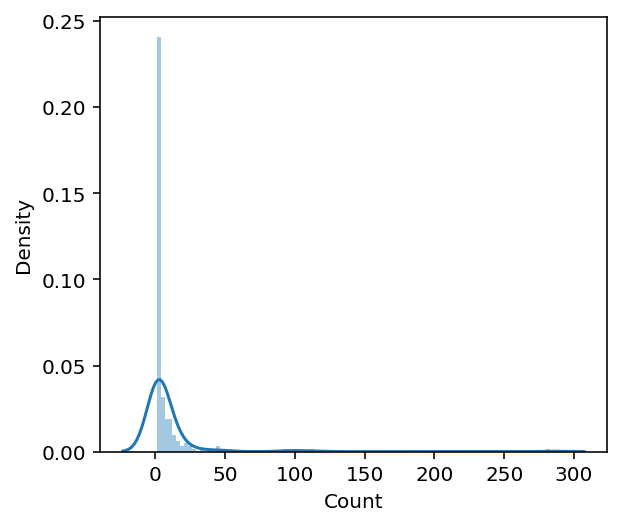

Average Number of EV Charging Stations by City : 7.94


In [128]:
# Quick distribution of EV charging stations by Count
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(bar_chart['Count'],bins = 100)
plt.show()

print('Average Number of EV Charging Stations by City : '+'\033[1m' + str(round(bar_chart.Count.mean(),2)) +'\033[0m')

### This distribution plot alongside the above value counts table shows us that the vast majority of cities have only 1 or more EV charging stations with the average number of charging stations a BC city has is 8 (rounding up as we can't have 0.9 of a charging station).

## EV Network Development Trends

In [129]:
# I want to examine the Open Date of these EV charging stations to examine trend lines. To do this, I will create a time series
# trend line chart taking each year, by month and the number of EV's opened to explore the trends of new EV's being opened.

In [130]:
df[['Year','Month','Day']] = df['Open Date'].str.split('-', expand=True)
df["Open-Date"] = df['Year'].astype(str) +"-"+ df["Month"]
df

,Station Name,Street Address,Intersection Directions,City,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Open Date,EV Connector Types,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,Year,Month,Day,Open-Date
0,City of Nanaimo - Underground Parking Lot,101 Gordon St,NaN,Nanaimo,V9R 5J6,250-754-4251,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,Non-Networked,NaN,200-9,49.164770,-123.936147,2020-03-05,83426,2021-06-07 17:08:43 UTC,P,2017-02-15,J1772,NaN,MUNI_GOV,Free,NaN,False,2017,02,15,2017-02
1,Fulford Community Hall,2591 Fulford-Ganges Rd,NaN,Salt Spring Island,V8K 1Z4,NaN,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,GPS,48.772431,-123.465926,2022-08-09,83491,2022-08-09 21:18:29 UTC,P,2020-08-21,J1772,NaN,MUNI_GOV,Free; donations accepted,NaN,False,2020,08,21,2020-08
2,Poets Cove Resort and Spa,9801 Spalding Rd,NaN,Pender Island,V0N 2M3,250-629-2100,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,200-9,48.748128,-123.227170,2022-08-09,83492,2022-08-09 21:18:29 UTC,P,2017-05-17,J1772,NaN,HOTEL,Free,NaN,False,2017,05,17,2017-05
3,City of Merritt - City Hall,2185 Voght St,Located on the front posts of the building,Merritt,V1K 1R6,250-378-4224,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,Non-Networked,NaN,200-9,50.112488,-120.788241,2022-07-08,83527,2022-07-08 16:02:07 UTC,P,2014-06-15,J1772,NaN,MUNI_GOV,Free,NaN,False,2014,06,15,2014-06
4,North Shore Kia,855 W 1st St,NaN,North Vancouver,V7P 1A4,NaN,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,1.0,NaN,Non-Networked,NaN,GPS,49.317660,-123.096703,2022-04-13,83550,2022-04-26 16:04:15 UTC,P,2021-02-09,J1772,CALL,CAR_DEALER,Free,NaN,False,2021,02,09,2021-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,Tesla - 12802 - Fernie BC,2001 BC-3,NaN,Fernie,V0B 1M1,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,2.0,FLO,https://flo.ca/,GPS,49.498195,-115.080541,2023-03-19,256487,2023-03-19 00:52:26 UTC,NaN,2023-03-17,CHADEMO J1772COMBO,NaN,NaN,NaN,NaN,NaN,2023,03,17,2023-03
1775,Tesla - 13584 - Prince George BC,3036 Replace Dr.,NaN,Prince George,V2N 0G2,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,1.0,FLO,https://flo.ca/,GPS,53.890624,-122.767879,2023-03-19,256488,2023-03-19 00:52:26 UTC,NaN,2023-03-17,CHADEMO J1772COMBO,NaN,NaN,NaN,NaN,NaN,2023,03,17,2023-03
1776,Tesla - 8447 - Cranbrook BC,1500 Cranbrook St,NaN,Cranbrook,V1C 3S8,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,2.0,FLO,https://flo.ca/,GPS,49.525024,-115.752557,2023-03-19,256495,2023-03-19 00:52:26 UTC,NaN,2023-03-17,CHADEMO J1772COMBO,NaN,NaN,NaN,NaN,NaN,2023,03,17,2023-03
1777,Vic West DCFC,95 Bay St,NaN,Victoria,V9A 6X9,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,2.0,FLO,https://flo.ca/,GPS,48.431767,-123.383453,2023-03-19,256496,2023-03-19 00:52:26 UTC,NaN,2023-03-17,CHADEMO J1772COMBO,NaN,NaN,NaN,NaN,NaN,2023,03,17,2023-03


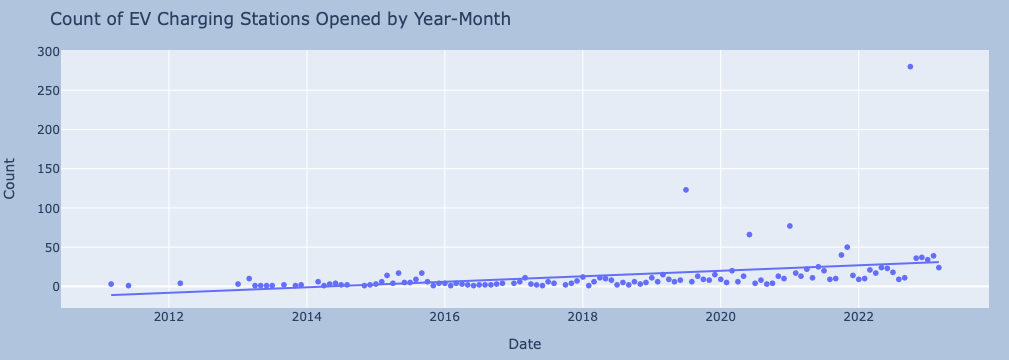

In [131]:
line_plot = df['Open-Date'].value_counts().rename_axis('Date').reset_index(name='Count').sort_values(by=['Date'],ascending=True).reset_index(drop=True)
line_plot['Date']= pd.to_datetime(line_plot['Date'])
fig = px.scatter(line_plot, x="Date", y="Count",trendline="ols", title="Count of EV Charging Stations Opened by Year-Month")
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

### This graph takes the datetime of each EV station opening along the x-axis against the number of EV stations opened that month. The timescale is for the entire dataset starting at March 2011 and ending on March 2023. From this graph, we can see that the number of EV openings has remained relatively the same between 2012 and 2018, but after 2018 we begin to see a gradually increase in the number of EV charging stations being opened with certain months having very high EV openings such as July 2019, January 2021 and October 2022.

In [132]:
# Next I want to examine seasonal decomposition of the timescale to examine overall trends within BC's EV Network
trend_data = df['Open-Date'].value_counts().rename_axis('Date').reset_index(name='Count').sort_values(by=['Date'],ascending=True)
trend_data

,Date,Count
82,2011-03,3
115,2011-06,1
74,2012-03,4
86,2013-01,3
39,2013-03,10
...,...,...
8,2022-11,36
7,2022-12,37
9,2023-01,34
6,2023-02,39


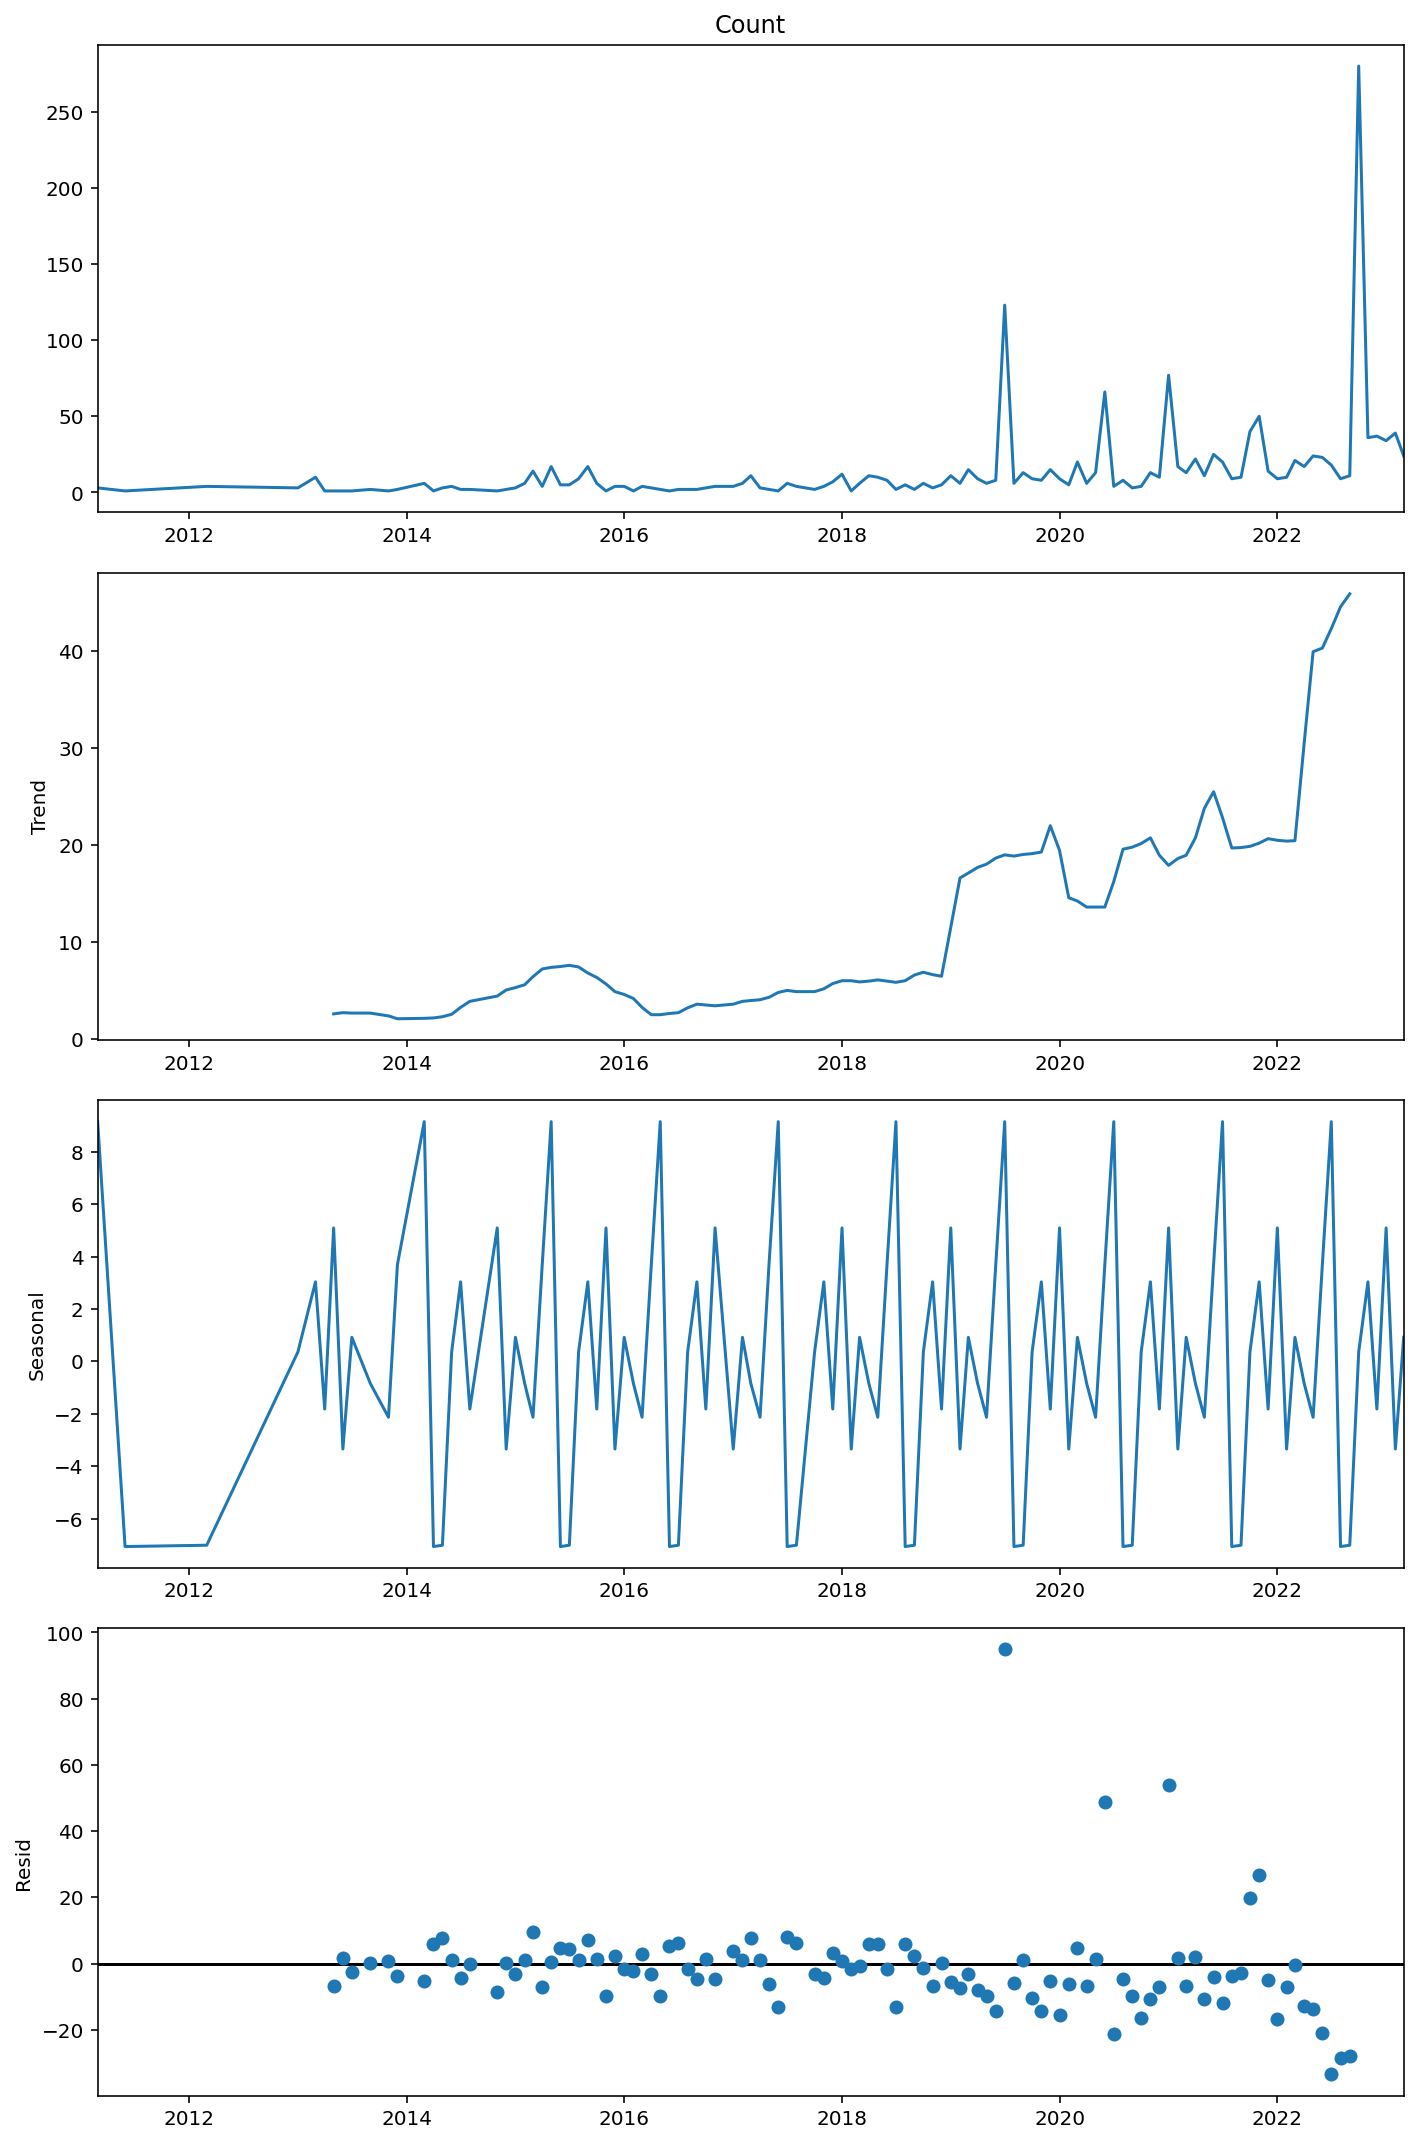

In [133]:
 # Seasonal Decomposition
rcParams['figure.figsize'] = 10,15
trend_data = df['Open-Date'].value_counts().rename_axis('Date').reset_index(name='Count').sort_values(by=['Date'],ascending=True).reset_index(drop=True)
trend_data['Date']= pd.to_datetime(trend_data['Date'])
trend_data = trend_data.set_index('Date')
decomposition = sm.tsa.seasonal_decompose(trend_data['Count'], model='additive',period=12) # additive seasonal index
fig = decomposition.plot()

### These four graphs makeup the seasonal decomposition of BC's EV network. From Top to Bottom:
     
#### 1.) The first graph is the original time series data.

#### 2.) The second graph shows us the trend in the data. What we can see here is that between 2015 and 2016, there was an     increase in the number of EV charging stations being developed in BC. But then that trend declined to 2014 levels and remained there until 2019. Then we see that there was a huge increase in the number of charging stations being opened until the covid-19 pandemic hit where there was another decline. But this trend recovered and continued in 2021 and in 2022 saw the highest number of EV charging stations being opened.

#### 3.) The third graph shows us the seasonality component in the data. It seems there is a pattern during the year for EV stations being opened where the number of stations opened is higher in the earlier months of the year and then lower over the summer months.

#### 4.) The fourth and final graph is the noise in the data. This graph shows us the random fluctations in the data and is helpful for highlighting outliers and shows us if seasonal decomposition has performed well on this data. Based on this graph, certain months in 2019 and 2020, and 2021 may be outliers and it appears that seasonal deocomposition has done an effective job of capturing the dataset as there is no clear pattern in the residuals.

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_98090/562938782.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



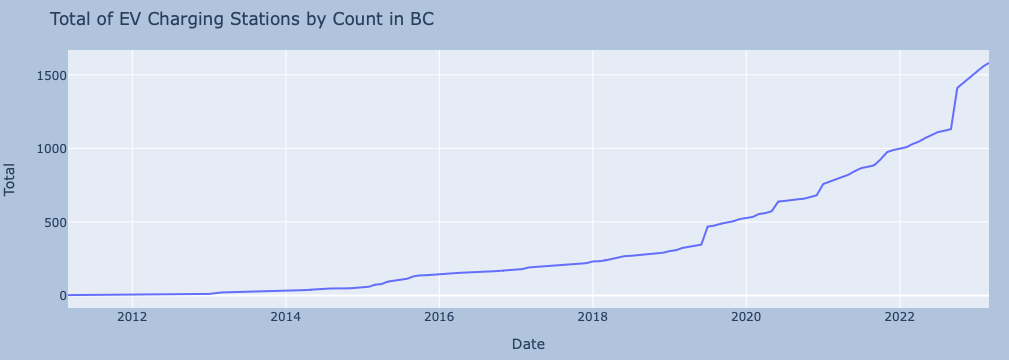

In [134]:
# Graph and dataset highlighting growth of EV's in BC
trend_data = trend_data.reset_index(drop=False)
trend_data['Total'] = 3
for i in range(len(trend_data)-1):
    count = trend_data['Count'][i+1]
    total = count + trend_data['Total'][i]
    trend_data['Total'][i+1] = total

fig = px.line(trend_data, x="Date", y="Total", title="Total of EV Charging Stations by Count in BC")
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

### This graph highlights the growth in EV's with the date on the x-axis and the total number of charging stations in BC on the y-axis. Adding the sum of these charging stations together we have a total of 1581 EV stations across BC, with the majority of these charging stations being developed over the last three years. This is different from the shape of the total dataset at 1779 due to the Open Date Column having 1581 non-null values. The Trend Dataset used to create this graph can also be used to calculate the growth rates between years of EV charging stations being opened. 

In [156]:
trend_data

,Date,Count
0,2011,3
1,2011,1
2,2012,4
3,2013,3
4,2013,10
...,...,...
112,2022,36
113,2022,37
114,2023,34
115,2023,39


In [135]:
trend_data = trend_data.drop(columns=['Total'])
trend_data['Date'] = trend_data['Date'].apply(lambda x: x.strftime('%Y'))

In [180]:
group_df = trend_data.groupby(by=['Date']).sum()
group_df['Growth_Rate_Percentage'] = group_df['Count'].pct_change()*100
group_df

,Count,Growth_Rate_Percentage
Date,,
2011,4,NaN
2012,4,0.000000
2013,22,450.000000
2014,21,-4.545455
2015,91,333.333333
2016,28,-69.230769
2017,50,78.571429
2018,71,42.000000
2019,229,222.535211


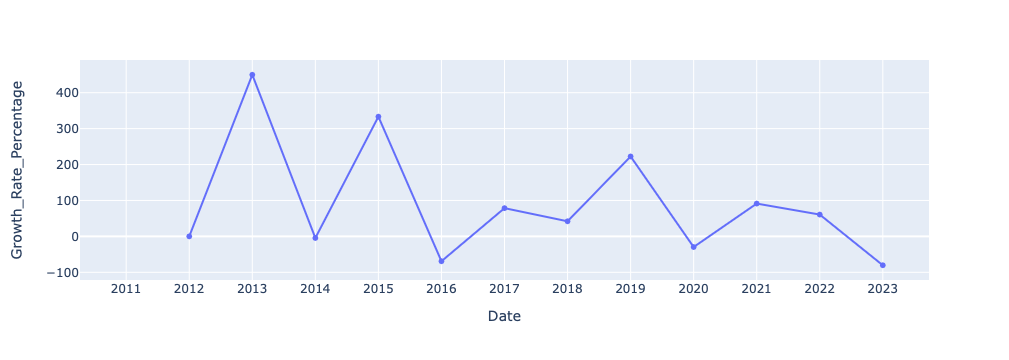

In [181]:
fig = px.line(group_df, x=group_df.index, y='Growth_Rate_Percentage',markers=True)
fig.show()

### This graph along with the previous dataset shows the growth rate of EV's being opened over the last decade in BC. From here we can see that the years of 2013 (450%), 2015 (333%), 2019 (222%) and 2021 (91%) saw some of the highest jumps in the number of EV stations being opened. It is also important to note that the current growth rate for 2023 is deceiving as the year is incomplete. 

### To complete my analysis of the growth in BC's EV charging station network, I will end with a simple Linear Regression to forecast the 2023 year using the previous dataset.

In [188]:
group_df = group_df.reset_index()
group_df['Date'] = group_df['Date'].astype(int)
group_df

,index,Date,Count,Growth_Rate_Percentage
0,0,2011,4,NaN
1,1,2012,4,0.000000
2,2,2013,22,450.000000
3,3,2014,21,-4.545455
4,4,2015,91,333.333333
5,5,2016,28,-69.230769
6,6,2017,50,78.571429
7,7,2018,71,42.000000
8,8,2019,229,222.535211
9,9,2020,161,-29.694323


In [189]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Count ~ Date', data=group_df[0:12])
model = model.fit()

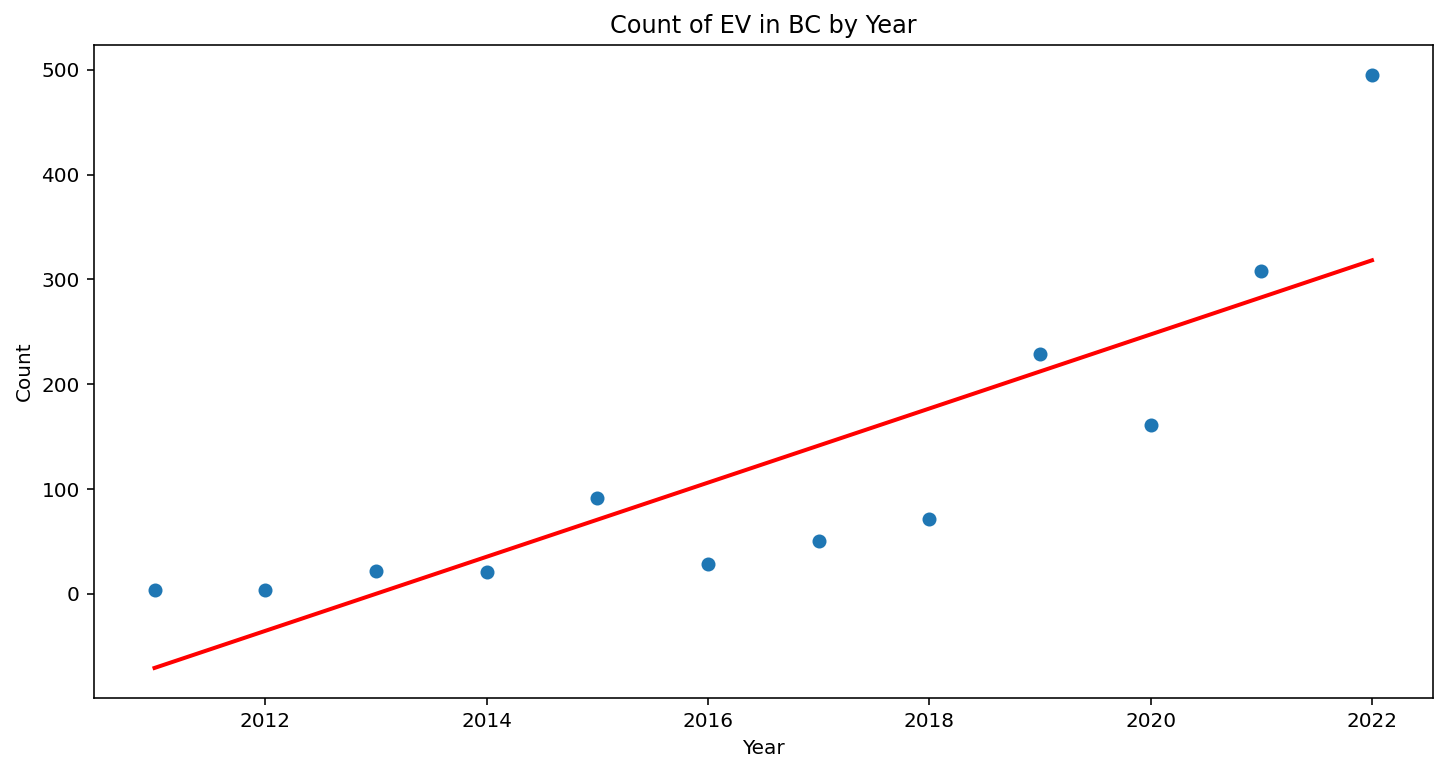

In [190]:
# Predict values
pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(group_df['Date'][0:12], group_df['Count'][0:12], 'o')           
plt.plot(group_df['Date'][0:12], pred, 'r', linewidth=2)   
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of EV in BC by Year')

plt.show()

In [191]:
new_X = 2023
model.predict({"Date": new_X})

0    353.484848
dtype: float64

### Using simple Linear Regression, we can forecast that 354 EV charging stations should be added to BC EV charging station network

## EV Charger Types

In [138]:
# To examine charger types, I first begin with value counts, examining null and non null values in the columns of 
# EV Level 1 EVSE Num, Level 2 and Fast Chargers.

In [139]:
df['EV Level1 EVSE Num'].value_counts(dropna=False)

NaN    1777
1.0       1
2.0       1
Name: EV Level1 EVSE Num, dtype: int64

In [140]:
df['EV Level2 EVSE Num'].value_counts(dropna=False)

2.0     896
NaN     366
1.0     271
4.0      89
3.0      48
6.0      37
5.0      17
10.0     12
8.0      11
7.0       9
12.0      6
14.0      3
16.0      2
11.0      2
9.0       2
20.0      2
18.0      1
60.0      1
28.0      1
30.0      1
13.0      1
33.0      1
Name: EV Level2 EVSE Num, dtype: int64

In [141]:
df['EV DC Fast Count'].value_counts(dropna=False)

NaN     1376
2.0      179
1.0      146
4.0       22
8.0       20
12.0      12
3.0        7
6.0        6
10.0       3
20.0       2
16.0       2
5.0        2
22.0       1
24.0       1
Name: EV DC Fast Count, dtype: int64

In [142]:
df['EV Level2 EVSE Num'].isnull().sum()

366

In [143]:
check = df.loc[df['EV Level1 EVSE Num'].notnull()]
check

,Station Name,Street Address,Intersection Directions,City,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Open Date,EV Connector Types,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,Year,Month,Day,Open-Date
23,Kelowna Infiniti Nissan,2741 Highway 97 N,NaN,Kelowna,V1X 4J8,250-712-0404,E,NaN,Public - Call ahead,Dealership business hours; for client use only...,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,49.889576,-119.428027,2022-07-08,84182,2022-07-08 16:02:07 UTC,P,2013-03-15,J1772 NEMA520,CALL,CAR_DEALER,Free,NaN,True,2013,03,15,2013-03
77,British Columbia Institute of Technology - Par...,4475 Wayburn Ave,NaN,Burnaby,V5G 4X4,604-434-5734,E,NaN,Public,24 hours daily; Drivers must bring their own J...,NaN,2.0,6.0,2.0,Non-Networked,NaN,GPS,49.249413,-122.999107,2019-10-10,84744,2022-02-10 21:00:18 UTC,P,2014-03-01,CHADEMO J1772 NEMA520,NaN,COLLEGE_CAMPUS,Free,SOLAR,False,2014,03,01,2014-03


### Here is where I discovered that some chargers can support more than one level type of charging. Indeed adding up the non-null value counts in the levels and fast EV charger columns comes to a value of 1818, 19 rows larger than the original dataset of 1779. So to examine if there are more or less charger types, we would have to examine chargers that exclusivly support a specific level type and which chargers are hybirds that support more than one.

In [144]:
charger_df = df[['EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count']]
charger_df

,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count
0,NaN,2.0,NaN
1,NaN,1.0,NaN
2,NaN,1.0,NaN
3,NaN,2.0,NaN
4,NaN,1.0,NaN
...,...,...,...
1774,NaN,NaN,2.0
1775,NaN,NaN,1.0
1776,NaN,NaN,2.0
1777,NaN,NaN,2.0


In [145]:
charger_df['EV DC Fast Count'].value_counts()

2.0     179
1.0     146
4.0      22
8.0      20
12.0     12
3.0       7
6.0       6
10.0      3
20.0      2
16.0      2
5.0       2
22.0      1
24.0      1
Name: EV DC Fast Count, dtype: int64

In [146]:
charger_df['EV Level2 EVSE Num'].value_counts()

2.0     896
1.0     271
4.0      89
3.0      48
6.0      37
5.0      17
10.0     12
8.0      11
7.0       9
12.0      6
14.0      3
16.0      2
11.0      2
9.0       2
20.0      2
18.0      1
60.0      1
28.0      1
30.0      1
13.0      1
33.0      1
Name: EV Level2 EVSE Num, dtype: int64

In [147]:
charger_df.dtypes

EV Level1 EVSE Num    float64
EV Level2 EVSE Num    float64
EV DC Fast Count      float64
dtype: object

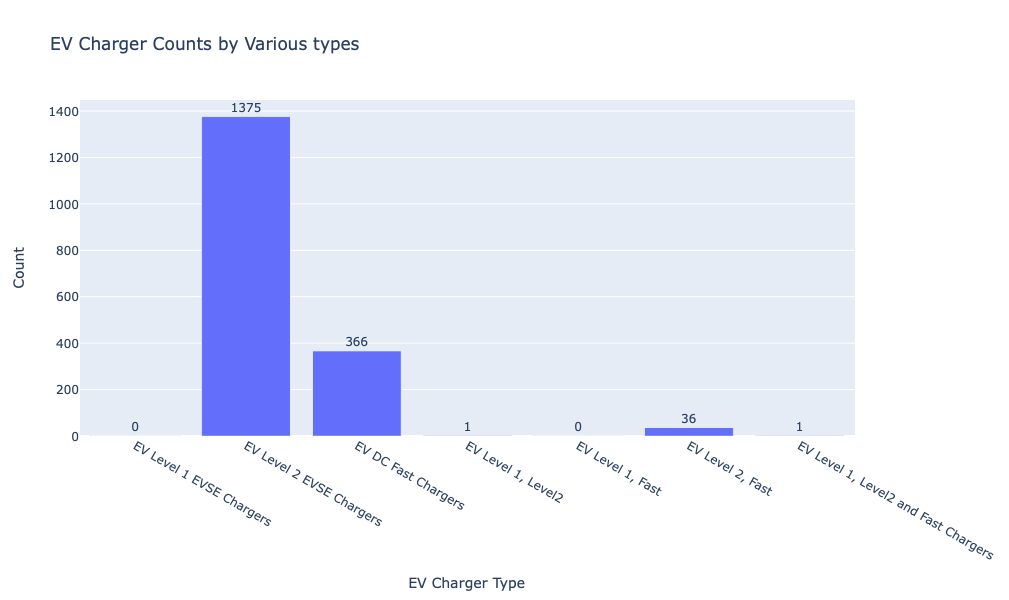

In [148]:
# EV Charging station that supports all three level types
charger_df = charger_df.fillna(-1)

# Then creating columns that examine every other possible hybrid charging station
charger_df['EV Level 1 EVSE Chargers'] = np.where((charger_df['EV Level1 EVSE Num'] != -1) & 
                               (charger_df['EV Level2 EVSE Num'] == -1) & 
                                (charger_df['EV DC Fast Count'] == -1), 1,0)

charger_df['EV Level 2 EVSE Chargers'] = np.where((charger_df['EV Level1 EVSE Num'] == -1) & 
                               (charger_df['EV Level2 EVSE Num'] != -1) & 
                                (charger_df['EV DC Fast Count'] == -1), 1,0)

charger_df['EV DC Fast Chargers'] = np.where((charger_df['EV Level1 EVSE Num'] == -1) & 
                               (charger_df['EV Level2 EVSE Num'] == -1) & 
                                (charger_df['EV DC Fast Count'] != -1), 1,0)

charger_df['EV Level 1, Level2'] = np.where((charger_df['EV Level1 EVSE Num'] != -1) & 
                               (charger_df['EV Level2 EVSE Num'] != -1) & 
                                (charger_df['EV DC Fast Count'] == -1), 1,0)

charger_df['EV Level 1, Fast'] = np.where((charger_df['EV Level1 EVSE Num'] != -1) & 
                               (charger_df['EV Level2 EVSE Num'] == -1) & 
                                (charger_df['EV DC Fast Count'] != -1), 1,0)

charger_df['EV Level 2, Fast'] = np.where((charger_df['EV Level1 EVSE Num'] == -1) & 
                               (charger_df['EV Level2 EVSE Num'] != -1) & 
                                (charger_df['EV DC Fast Count'] != -1), 1,0)

charger_df['EV Level 1, Level2 and Fast Chargers'] = np.where((charger_df['EV Level1 EVSE Num'] != -1) & 
                               (charger_df['EV Level2 EVSE Num'] != -1) & 
                                (charger_df['EV DC Fast Count'] != -1), 1,0)

# After creating these columns, we can sum then up and plot the different types of chargers in BC
 
charger_df_count = charger_df.sum()
charger_df_count = pd.DataFrame(charger_df_count)
charger_df_count = charger_df_count.iloc[3:]
charger_df_count = charger_df_count.reset_index()
charger_df_count = charger_df_count.rename(columns={"index": "EV Charger Type", 0: 'Count'})

fig = px.bar(charger_df_count, x='EV Charger Type', y='Count',height=600, text='Count',
            title="EV Charger Counts by Various types")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### According to this graph the vast majority of EV chargerss in BC are of EV Level 2 EVSE at 1375. The second highest is EV DC Fast Chargers at 366. We then have a series of hybird chargers where there are 36 EV chargers that support EVSE Level 2 and EV DC Fast. Then there is one EV charger that can support all three levels in BC.

## EV Pricing

In [149]:
df['EV Pricing'].value_counts(dropna=False)

NaN                                                                    1385
Free                                                                    256
$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW      41
$0.21 per minute                                                         33
Free; parking fee required                                                9
$0.27 per minute                                                          9
$3 per hour                                                               7
$1.50 per hour                                                            4
FREE                                                                      3
$1 per hour                                                               2
$0.00-$2.00/Hr Variable Parking Fee                                       1
$0.2113 per minute                                                        1
$0.30 per minute                                                          1
L2: Free; DC

### First thing I notice is that there is a not many data entries as the vast majority of pricing is registered as NaN. Second is that the there is not a effective consistency between data entry for pricing types. For example there is entires for FREE all uppercase and Free, titled. Given the high cardinality of the data, I think it would be best to group the values together based on similar category. First, categories with high value counts will be left as is such as Free, 0.44 per minute parking, 0.21 per minute parking, and categories with one occurrence will be binned together with similar high value count categories, ie. (Free for guests will be converted to Free, as they are relatively close in similarity).

In [150]:
df_pricing

,Station Name,Street Address,Intersection Directions,City,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Open Date,EV Connector Types,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,Year,Month,Day,Open-Date
0,City of Nanaimo - Underground Parking Lot,101 Gordon St,NaN,Nanaimo,V9R 5J6,250-754-4251,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,Non-Networked,NaN,200-9,49.164770,-123.936147,2020-03-05,83426,2021-06-07 17:08:43 UTC,P,2017-02-15,J1772,NaN,MUNI_GOV,Free,NaN,False,2017,02,15,2017-02
1,Fulford Community Hall,2591 Fulford-Ganges Rd,NaN,Salt Spring Island,V8K 1Z4,NaN,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,GPS,48.772431,-123.465926,2022-08-09,83491,2022-08-09 21:18:29 UTC,P,2020-08-21,J1772,NaN,MUNI_GOV,Free,NaN,False,2020,08,21,2020-08
2,Poets Cove Resort and Spa,9801 Spalding Rd,NaN,Pender Island,V0N 2M3,250-629-2100,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,200-9,48.748128,-123.227170,2022-08-09,83492,2022-08-09 21:18:29 UTC,P,2017-05-17,J1772,NaN,HOTEL,Free,NaN,False,2017,05,17,2017-05
3,City of Merritt - City Hall,2185 Voght St,Located on the front posts of the building,Merritt,V1K 1R6,250-378-4224,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,Non-Networked,NaN,200-9,50.112488,-120.788241,2022-07-08,83527,2022-07-08 16:02:07 UTC,P,2014-06-15,J1772,NaN,MUNI_GOV,Free,NaN,False,2014,06,15,2014-06
4,North Shore Kia,855 W 1st St,NaN,North Vancouver,V7P 1A4,NaN,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,1.0,NaN,Non-Networked,NaN,GPS,49.317660,-123.096703,2022-04-13,83550,2022-04-26 16:04:15 UTC,P,2021-02-09,J1772,CALL,CAR_DEALER,Free,NaN,False,2021,02,09,2021-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Fort Rodd Hill - National Historic Site - Tes...,603 Fort Rodd Hill Road,NaN,Victoria,V9C 2W8,250-478-5849 877-798-3752,E,NaN,Public,NaN,NaN,NaN,4.0,NaN,Tesla Destination,https://www.tesla.com/destination-charging,GPS,48.433730,-123.454080,2022-10-06,251057,2023-01-18 15:15:20 UTC,P,2021-01-16,J1772 TESLA,NaN,NaN,Free,NaN,NaN,2021,01,16,2021-01
1713,Regional District of Mount Waddington - Sointu...,120 13th Ave,Turn left off of ferry on to 1st Street until ...,Sointula,V0N 3E0,250-956-3301,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,200-8,50.628050,-127.017650,2023-03-08,254291,2023-03-08 17:16:33 UTC,LG,2016-01-01,J1772,NaN,FIRE_STATION,Free,NaN,False,2016,01,01,2016-01
1714,Regional District of Mount Waddington - Coal H...,361 Albert Hole Rd,"Upon entering Coal Harbour from Port Hardy, pr...",Coal Harbour,V0N 1K0,250-956-3301,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,200-8,50.600590,-127.584350,2023-03-08,254292,2023-03-08 17:16:33 UTC,LG,2016-01-01,J1772,NaN,FIRE_STATION,Free,NaN,False,2016,01,01,2016-01
1715,Regional District Of Mount Waddington - Office...,2044 McNeill Rd,Off Hwy 19 at Port McNeill Junction and onto C...,Port Mcneill,V0N 2R0,250-956-3301,E,NaN,Public,24 hours daily,NaN,NaN,1.0,NaN,Non-Networked,NaN,200-8,50.584800,-127.079780,2023-03-08,254293,2023-03-08 17:16:33 UTC,LG,2013-03-15,J1772,NaN,OFFICE_BLDG,Free,NaN,False,2013,03,15,2013-03


In [151]:
# Some small data cleaning to improve consistency and bin similar EV stations by category.

# Removing rows with missing price data
df_pricing = df.dropna(subset=['EV Pricing'])

# Replacing rows with aspects of Free to general category free
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['FREE',
                                             'Free; donations accepted','Free for guests'], 'Free')

# Replacing rows with aspects of per minute kwh with general category $0.44/$0.22 per minute
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['$0.35 per kWh',
                                                             '0.18 cents per kW'], '$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW')

# Replacing rows close to or related to general category of $0.21 per minute. 
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['$0.2113 per minute',
                                             'DCFC: $0.21 per minute; L2: Free',
                                            '$0.2113 (CAD) per minute plus tax',
                                            'DCFC: $0.21 per minute'
                                            ], '$0.21 per minute')

# Replacing rows close to $0.27 per minute
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['$0.30 per minute','$15 per hour',
                                             'L2: Free; DC Fast: $0.27 per minute','Free for guests'], '$0.27 per minute')

# Replacing rows close to $3 per hour
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['$3 per hour first 4 hours, $6 per hour for any additional hours',
                                             '$3.50 per hour for first hour, $4 per hour after',
                                            'Free for first two hours; $3 per hour thereafter',
                                            '$5 per session'], '$3 per hour')

# Replacing rows close to $1.50 per hour
df_pricing['EV Pricing'] = df_pricing['EV Pricing'].replace(['$1 per hour',
                                             '$1.00 per hour','$1.25 per hour','$2 per hour',
                                            'DC fast: $0.35 per kWh; $2 minimum','$0.21 per hour'], '$1.50 per hour')

# Converting rows with the term Fee or fee in them to Free, with parking required
df_pricing.loc[df_pricing['EV Pricing'].str.contains('Fee'), 'EV Pricing'] = 'Free; parking fee required'
df_pricing.loc[df_pricing['EV Pricing'].str.contains('fee'), 'EV Pricing'] = 'Free; parking fee required'

df_pricing['EV Pricing'].value_counts()

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_98090/2080937377.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_98090/2080937377.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_98090/2080937377.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Free                                                                   261
$0.44 per minute above 60 kW and $0.22 per minute at or below 60 kW     43
$0.21 per minute                                                        37
Free; parking fee required                                              19
$0.27 per minute                                                        12
$3 per hour                                                             11
$1.50 per hour                                                          11
Name: EV Pricing, dtype: int64

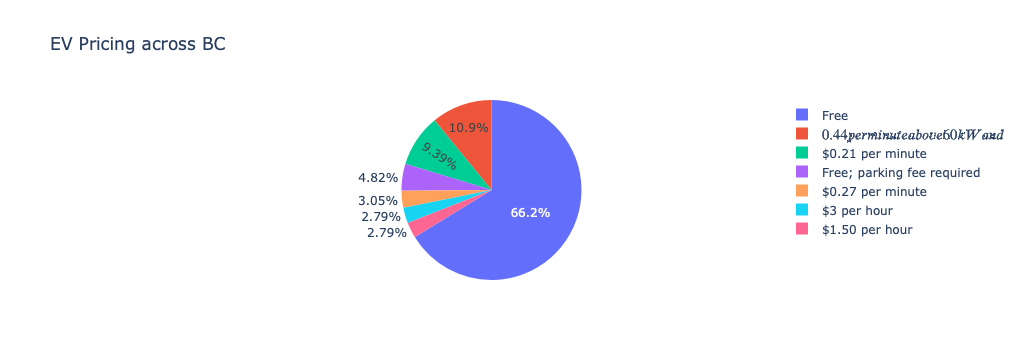

In [152]:
# Using plotly.express
price_df = df_pricing['EV Pricing'].value_counts().to_frame()
price_df = price_df.reset_index()
price_df = price_df.rename(columns={"index": "Category"})

# Using plotly.express
fig = px.pie(price_df, values='EV Pricing', names='Category',title = 'EV Station Pricing across BC')
fig.show()

### After binning values to reduce cardinality, we see that nearly two-thirds of the cost of EV charging stations in BC are free. The remaining charging stations include conditions on the amount charged to consumers, such as 21 cents per minute, or free but with parking fees required.

### As most of the EV stations are free, an analysis detailing which BC cities pay more for EV charging may not be as helpful for the overall BC EV network analysis as differences may be neglible.

## Additional Questions

### After analysing this dataset, I would have preferred to examine the distances between EV charging stations and determine if a resident in Surrey, for example, had a harder time accessing an EV station compared to a resident of Vancouver. I attempted to map the location of EV vehicles, but I was not able to quickly collect the geospatial data from the BC public government. While a map may have been interesting, determining which BC residents may have to travel longer distances to access a public EV charging station was something I would have liked to answer. 

### One concern could be the centralization of EV charging stations in BC's major cities like Vancouver while smaller towns have far fewer the number of EV charging stations. This lack of distribution could hinder the adoption of electric vehicles in BC if there are not enough publicly EV charging stations available outside of big cities.

### I would recommended greater data retention as some variables are missing which makes a further-indepth analysis difficult. I also found inconsistencies in the way data is entered into the system and I think improving this consistency would be an improvement. 